# Simple Linear Regression

Simple Linear Regression is a linear approach to modeling the relationship between single independent variable with one dependent variable. It finds a linear funcion that maps dependent variable y as a function of independent variable x. (Wikipedia)

Usually the function is written as $$ y = mx + c $$ or alternatively, $$  y =\theta_1 x + \theta_0 $$

Reference: https://towardsdatascience.com/ 

The project has the following tasks:

1. Understand the data that you are going to work with and convert it to a data frame.
2. Prepare the data for building the model.
3. Create and build the machine learning model.
4. Visualize the results
5. Measure the performance of the model.

## Task 1: Import  dataset

In [1]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
## Import the dataset

data = pd.read_csv('ML_Lab 03_salary_data.csv')
# change the path as necessary

X = data.iloc[:, :-1].values # copy all columns excluding last column
Y = data.iloc[:, 1].values   # copy the last column only

In [3]:
# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30, 1)
(30,)


## Task 2: Prepare and visualize the given data set

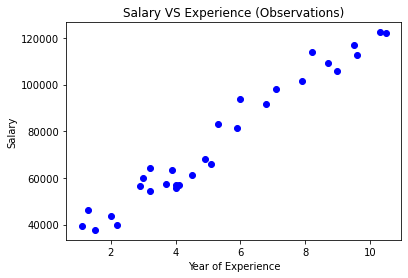

In [4]:
# Visualize the dataset

plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

# There are 30 observations or rows in the dataset. 
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size. 
# In this example test_size=1/3 says that 20 observations are used for training
# and rest 10 observations are used for testing.

# randam_state is the seed for the random number generator. 


## Task 3: Create and train the machine learning model

In [6]:
# Fit Simple Linear Regression to the Training dataset

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

## Task 4: Visualize the results

In [7]:
# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [9345.94244312]
Intercept = Theta0 =  26816.19224403119


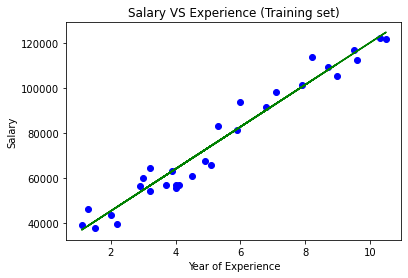

In [8]:
# Visualize the fitted regression line

viz = plt
viz.scatter(X, Y, color='blue')
viz.plot(X_train, model.predict(X_train), color='green')
viz.title('Salary VS Experience (Training set)')
viz.xlabel('Year of Experience')
viz.ylabel('Salary')
viz.show()

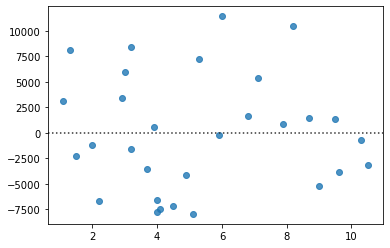

In [9]:
# Plot the residuals i.e. the distance between regression line and actual point

import seaborn
seaborn.residplot(x=X, y=Y)
plt.show()

## Task 5: Making Predictions

In [16]:
# Predict salary that can be offered for 7 years of experience

x = np.atleast_1d(7).reshape(-1,1) # convert scalar to array

# Predict the value 
y_pred = model.predict(x)

print('For x= 7 yrs of experience, predicted salary = ', y_pred)

For x= 7 yrs of experience, predicted salary =  [92237.78934589]


In [17]:
Y_predict = model.predict(X_test)

## Task 6: Performance measures

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 21026037.33
Variance score = 0.97
